In [1]:
import numpy as np
import  matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
import sklearn.model_selection
from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model
%matplotlib inline

In [2]:
data = pd.read_csv('Cars93.csv')
x =  ['MPG.city', 'MPG.highway', 'EngineSize', 
           'Horsepower', 'RPM', 'Rev.per.mile',
           'Fuel.tank.capacity', 'Passengers', 'Length',
           'Wheelbase', 'Width', 'Turn.circle', 'Weight']
y = data['Price'].values.reshape(-1,1)

In [3]:
alphas = np.logspace(-10,1,100)
cv = np.ones(len(alphas))
coefs = []
for i in range(len(alphas)):
    clf = linear_model.Lasso(alpha=alphas[i],normalize=True)    
    loo = LeaveOneOut()
    MSE = np.ones(93)
    coef = 0
    for train_index, test_index in loo.split(x):
        
        X_train, X_test = data[x].iloc[train_index], data[x].iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]        
        
        clf.fit(X_train,y_train)
        coef += clf.coef_
        MSE[test_index] = (y_test - clf.predict(X_test))**2
    coef/= 93
    coefs.append(coef)
    cv[i] = np.sum(MSE)/len(MSE)

/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Text(0, 0.5, 'Cross Validation Error')

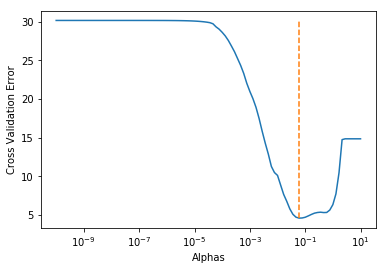

In [4]:
alpha1 = alphas[cv==min(cv)][0]
plt.semilogx(alphas,cv)
plt.plot([alpha1,alpha1],[min(cv),max(cv)],linestyle = "--")
plt.xlabel("Alphas")
plt.ylabel("Cross Validation Error")

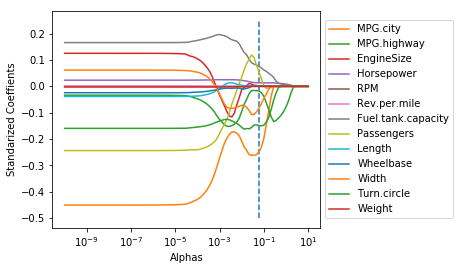

In [5]:
fig = plt.figure()
ax = plt.subplot(111)

ax.plot([alpha1,alpha1],[-0.5,0.25],linestyle = "--")
coefs = np.array(coefs)
for i in range(len(x)):
    ax.semilogx(alphas,coefs[:,i],label = x[i])
plt.xlabel('Alphas')
plt.ylabel('Standarized Coeffients')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Put a legend to the right of the current axis

In [6]:
clf2 = linear_model.Lasso(alpha=alpha1,normalize=True)
clf2.fit(data[x],y)

Lasso(alpha=0.059948425031893966, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [7]:
x = np.array(x)
x[clf2.coef_!=0]

array(['MPG.highway', 'Horsepower', 'Wheelbase', 'Width', 'Turn.circle'],
      dtype='<U18')

Los parametros mas relevantes son: 'MPG.highway', 'Horsepower', 'Wheelbase', 'Width', 'Turn.circle'